1 a Dataset creation

In [ ]:
import numpy as np
import pandas as pd
arr=np.array([['mango',2,50],['orange',5,60],['apple',10,70]])
df=pd.DataFrame(arr,columns=['Fruit Name','Kg','Cost per Kg'])
df['Total Cost']=df['Kg'].astype(int)*df['Cost per Kg'].astype(int)
print(df)
df.to_csv('fruits.csv')


  Fruit Name  Kg Cost per Kg  Total Cost
0      mango   2          50         100
1     orange   5          60         300
2      apple  10          70         700


1 b Random data set creation and visualization

   Match_Number  No_of_sixes  No_of_fours
0             1           14           25
1             2           12           11
2             3            8           14
3             4           12           15
4             5           13            8
5             6           13           26
6             7           10           24
7             8           17           25
8             9           10           28
9            10            9           17


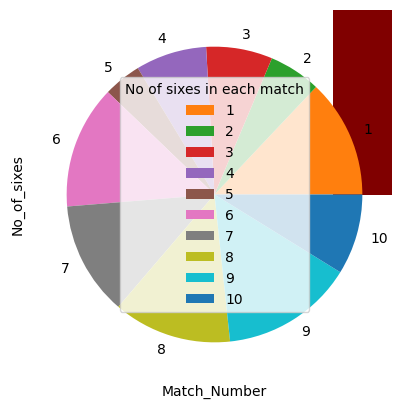

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.DataFrame({"Match_Number" : range(1,11),
                     "No_of_sixes"  : np.random.randint(5, 20, size=10),
                     "No_of_fours"  : np.random.randint(5, 30, size=10)
                     })
print(df)
df.to_csv('sport.csv')
plt.plot(df['Match_Number'],df[ "No_of_sixes"]) 
plt.bar(df['Match_Number'],df[ "No_of_fours"], color ='maroon',width = 0.4)
plt.scatter(df['Match_Number'],df[ "No_of_sixes"]) 
plt.xlabel('Match_Number')
plt.ylabel('No_of_sixes')
plt.pie(df["No_of_fours"],labels=df['Match_Number'])
plt.legend(title = "No of sixes in each match")

2 a Implementation of Simple linear regression

Accuracy:  1.142637556191362
RMSE:  1975.5638100627743


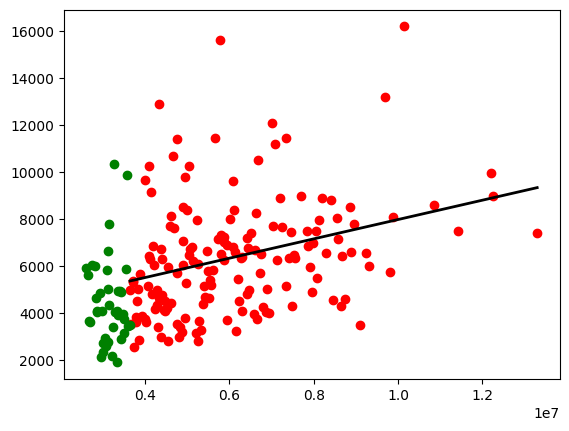

In [8]:
import matplotlib.pyplot as plt
import math
import pandas as p



df = p.read_csv("stadium.csv")
x = df["price"].tolist()[:160]
y = df["area"].tolist()[:160]

sum_x = sum(x)
sum_y = sum(y)
xy = []
def square_list(x):
    return x*x
for a in range(len(x)):
    pro = x[a]*y[a]
    xy.append(pro)
sum_xy = sum(xy)
sum_x_squared = sum(list(map(square_list,x)))
a = (len(x) * sum_xy - sum_x * sum_y) / (len(x) * sum_x_squared - sum_x ** 2)
b = (sum_y - a * sum_x) / len(x)

y_pred = [a*x[i] + b for i in range(len(x))]


x_test = df["price"].tolist()[160:200]
y_test = df["area"].tolist()[160:200]


y_test_pred = [a * x_test[i] + b for i in range(len(x_test))] 
numerator=sum((y_test[i] - y_test_pred[i])**2 for i in range(len(x_test)))
denominator=sum((y_test[i] - sum(y_test) / len(x_test))**2 for i in range(len(x_test)))


accuracy = numerator / denominator
rmse = math.sqrt(sum((y_test[i] - y_test_pred[i]) ** 2 for i in range(len(x_test))) / len(x_test))

print("Accuracy: ", accuracy)
print("RMSE: ",rmse)


plt.scatter(x, y, color='red')
plt.scatter(x_test, y_test, color='green')
plt.plot(x, y_pred, color='black', linewidth=2)
plt.show()


2 b Simple Linear Regression using inbuilt libraries

Correlation coefficient:  0.4975323459598769
P_value:  0.00011126009233164408
Standard error:  0.0001410809020447523


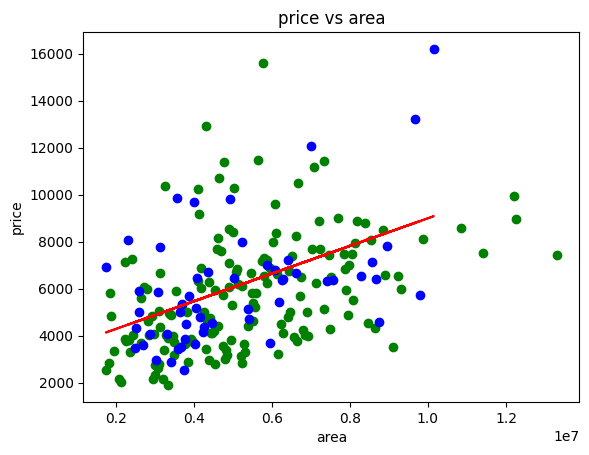

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as mtp 
from scipy import stats

df = pd.read_csv("stadium.csv")
x = np.array(df["price"])
y = np.array(df["area"])


x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 
slope,intercept,r,p,std_err=stats.linregress(x_test,y_test)

def myfunc(x):
    return slope*x+intercept

model=LinearRegression()
model.fit(x.reshape(-1,1),y)

mymodel=list(map(myfunc,x_test))

y_pred= model.predict(x_test.reshape(-1,1))  
x_pred= model.predict(x_train.reshape(-1,1))  
mtp.scatter(x_train, y_train, color="green") 
mtp.scatter(x_test,y_test,color='blue')  
mtp.plot(x_test, mymodel, color="red")    
mtp.title("price vs area")  
mtp.xlabel("area")  
mtp.ylabel("price")  
print("Correlation coefficient: ",r)
print("P_value: ",p)
print("Standard error: ",std_err)
mtp.show()   

3 a Implement naive baiyer without using inbuilt libraries

In [20]:
import math
import pandas as pd
data=pd.read_csv('Average.csv')
counts=data.groupby(['Team1','Team1_Status']).size().unstack(fill_value=0)
counts1=data.groupby(['Team2','Team1_Status']).size().unstack(fill_value=0)
counts2=data.groupby(['Venue','Team1_Status']).size().unstack(fill_value=0)

status_count=counts.sum(axis=0)


p_yes=counts['Yes']/status_count['Yes']
p_no=counts['No']/status_count['No']

p_yes1=counts1['Yes']/status_count['Yes']
p_no1=counts1['No']/status_count['No']

p_yes2=counts2['Yes']/status_count['Yes']
p_no2=counts2['No']/status_count['No']

p_yestotal=status_count['Yes']/(status_count['Yes']+status_count['No'])
p_nototal=status_count['No']/(status_count['Yes']+status_count['No'])

result=pd.DataFrame({'Team1':counts.index,'Yes':counts['Yes'],'No':counts['No'],
                     'Total_yes':status_count['Yes'],'Totoal_no':status_count['No'],
                     'P(Yes|Team1)':p_yes,'P(No|Team1)':p_no})
result=result.reset_index(drop=True)

result1=pd.DataFrame({'Team2':counts1.index,'Yes':counts1['Yes'],'No':counts1['No'],
                     'Total_yes':status_count['Yes'],'Totoal_no':status_count['No'],
                     'P(Yes|Team2)':p_yes1,'P(No|Team2)':p_no1})
result1=result1.reset_index(drop=True)

result2=pd.DataFrame({'Venue':counts2.index,'Yes':counts2['Yes'],'No':counts2['No'],
                     'Total_yes':status_count['Yes'],'Totoal_no':status_count['No'],
                     'P(Yes|Venue)':p_yes2,'P(No|Venue)':p_no2})
result2=result2.reset_index(drop=True)

print(result)
print(result1)
print(result2)

Team1=input('Enter Team1 name: ')
Team2=input('Enter Team2 name: ')
Venue=input('Enter Venue: ')

res_filtered=result[(result['Team1']==Team1)]
res1_filtered=result1[(result1['Team2']==Team2)]
res2_filtered=result2[(result2['Venue']==Venue)]

p_yesTeam1=res_filtered['P(Yes|Team1)'].values[0]
print(p_yesTeam1)
p_yesTeam2=res1_filtered['P(Yes|Team2)'].values[0]
p_yesVenue=res2_filtered['P(Yes|Venue)'].values[0]

p_noTeam1=res_filtered['P(No|Team1)'].values[0]
p_noTeam2=res1_filtered['P(No|Team2)'].values[0]
p_noVenue=res2_filtered['P(No|Venue)'].values[0]


p_yesfind=p_yesTeam1*p_yesTeam2*p_yesVenue*p_yestotal
p_nofind=p_noTeam1*p_noTeam2*p_noVenue*p_nototal
total = p_yesfind+p_nofind
print("Total: ",total)
while(math.isclose(total,1.0,abs_tol=0.001)==False):
    print("Normalization")
    p_yesfind=p_yesfind/total
    print("P(Yes|Find):",p_yesfind)
    p_nofind=p_nofind/total
    print("P(No|Find):",p_nofind)
    total=p_yesfind+p_nofind
    print('Total: ',total)

if(p_yesfind>=p_nofind):
    print("Team 1 can win")
else:
    print("Team 1 will lose")    


  Team1  Yes  No  Total_yes  Totoal_no  P(Yes|Team1)  P(No|Team1)
0   CSK    0   2          6          5      0.000000          0.4
1    DC    2   0          6          5      0.333333          0.0
2    GT    1   0          6          5      0.166667          0.0
3    MI    1   0          6          5      0.166667          0.0
4   RCB    1   1          6          5      0.166667          0.2
5    RR    1   1          6          5      0.166667          0.2
6   SRH    0   1          6          5      0.000000          0.2
  Team2  Yes  No  Total_yes  Totoal_no  P(Yes|Team2)  P(No|Team2)
0   CSK    2   0          6          5      0.333333          0.0
1    DC    0   1          6          5      0.000000          0.2
2    GT    1   0          6          5      0.166667          0.0
3   LSG    1   1          6          5      0.166667          0.2
4    MI    1   0          6          5      0.166667          0.0
5   RCB    0   1          6          5      0.000000          0.2
6    RR   

3 b Implement  with using naive_bayas libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

data = pd.read_csv('Average.csv')
data = pd.get_dummies(data, columns=['Team1', 'Team2', 'Venue'])
print(data)

df = pd.read_csv('Average.csv')
X = pd.get_dummies(df.drop('Team1_Status', axis=1))
print(X)
y = df['Team1_Status']
X_train, X_test, y_train, y_test = train_test_split(data.drop('Team1_Status', axis=1), data['Team1_Status'], test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X, y)
team1 = input("Enter Team 1: ")
team2 = input("Enter Team 2: ")
venue = input("Enter Venue: ")

X_new = pd.DataFrame({'Team1_' + team1: [1], 'Team2_' + team2: [1], 'Venue_' + venue: [1]})
X_new = X_new.reindex(columns=X.columns, fill_value=0)
y_new = model.predict(X_new)
y_pred = model.predict(X_test)
print(f"The predicted Team1_Status is {y_new[0]}")
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion_mat)
print('Classification Report:\n', class_report)

4 a Implementation of Decision Tree using ID3 algorithm

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('PlayTennis.csv')

X = df.drop('Play', axis=1)
y = df['Play']

le = LabelEncoder()
X = X.apply(le.fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()




4 b Implementation of Decision Tree using C4.5 algorithm

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('PlayTennis.csv')
x = df.drop('Play', axis=1)
y = df['Play']

le = LabelEncoder()
x = x.apply(le.fit_transform)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy', splitter='best')

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=x.columns, class_names=['0', '1'])
plt.show()


4 c  Implementation of Decision Tree using CART algorithm

In [ ]:

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('PlayTennis.csv')

x = df.drop('Play', axis=1)
y = df['Play']

le = LabelEncoder()
x = x.apply(le.fit_transform)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(criterion='gini', max_depth=None)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print("Accuracy is ", accuracy_score(y_test,y_pred)*100)


plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=x.columns, class_names=['0', '1'])
plt.show()

5 a K – Means Clustering with library

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

data = pd.read_csv("Overrun.csv")

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=3, random_state=0).fit(data_scaled)

data["cluster"] = kmeans.labels_

plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data["cluster"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("K-means Clustering")
plt.show()

5 b K – Means Clustering without library

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

data = pd.read_csv("Overrun.csv")
X = np.array(data)
K = 3
max_iters = 100
centroids = X[random.sample(range(len(X)), K)]
for i in range(max_iters):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    clusters = np.argmin(distances, axis=0)
    for k in range(K):
        centroids[k] = X[clusters == k].mean(axis=0)
plt.scatter(X[:, 0], X[:, 1], c=clusters)

plt.title("K-means Clustering")

plt.show()




6 a Ensemble Learning:
Bagging - Random Forest algorithm


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

df = pd.read_csv("url.csv")

X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

print("Total No of Columns:",X.shape[1])

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3)

rf = RandomForestClassifier(n_estimators=3, random_state=42)
rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)

accuracy_value = metrics.accuracy_score(Y_test, Y_pred)
print("\nAccuracy: ", accuracy_value*100)

test_data = [[0,0,1,5,0,0,0,0,0,1,1,1,0,0,1,0]]  # Example test data
predictions = []
print('\n')
for tree in rf.estimators_:
    prediction = tree.predict(test_data)
    predictions.append(prediction[0])
    print(f"Prediction of Tree {rf.estimators_.index(tree) + 1}: {'Not Malicious' if prediction[0]==0 else 'Malicious'}")

final_prediction = int(max(set(predictions), key=predictions.count))
print('\n')
if final_prediction == 0:
    print('It is not a Malicious URL')
else:
    print('It is a Malicious URL')



   6 b Ensemble Learning:
Boosting - Adaptive Boosting


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

data = pd.read_csv("url.csv")
x = data.drop(columns=['Domain','Label'],axis=1)
y = data['Label']

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.25)
adb = AdaBoostClassifier(learning_rate=0.3)
adb_model = adb.fit(X_train,Y_train)
print("The accuracy of the model on validation set is", adb_model.score(X_test,Y_test))  

6 c Boosting – Gradient Boosting

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = pd.read_csv('url.csv')

X = data.drop(columns=['Domain','Label'],axis = 1)
Y = data['Label']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
GradBoost = GradientBoostingClassifier(init=tree_model, learning_rate=0.1, n_estimators=200)
GradBoost.fit(X_train, Y_train)
Y_pred_boost = GradBoost.predict(X_test)

accuracy_boost = metrics.accuracy_score(Y_test, Y_pred_boost)
print("Accuracy of Gradient Boosted model: ", accuracy_boost*100)




6 d Boosting - LG Boosting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

data = pd.read_csv("url.csv")
x = data.drop(columns=['Domain','Label'],axis=1)
y = data['Label']

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.25)
lgb = LGBMClassifier(learning_rate=0.3)
lgb_model = lgb.fit(X_train,Y_train)
print("The accuracy of the model on validation set is", lgb_model.score(X_test,Y_test)*100)  

6 e Boosting - Categorical Boosting

In [ ]:



import pandas as pd
from sklearn.model_selection import train_test_split
import catboost as ctb

data = pd.read_csv("url.csv")
x = data.drop(columns=['Domain','Label'],axis=1)
y = data['Label']

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.25)
catb = ctb.CatBoostClassifier()
catb_model = catb.fit(X_train,Y_train)
print("The accuracy of the model on validation set is", catb_model.score(X_test,Y_test)*100)  

7 Support Vector Machine

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Load the dataset
url_data = pd.read_csv('url.csv')

# Separate the features and target variable
X = url_data.drop(columns=['Domain','Label'],axis=1)
y = url_data['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['Benign', 'Malicious'])
plt.yticks([0, 1], ['Benign', 'Malicious'])
plt.title('Confusion Matrix')
plt.show()

8 Reinforcement Learning: 
Q-learning


In [ ]:
import numpy as np
import gym

# Define the Q-learning function
def q_learning(env, num_episodes, alpha, gamma, epsilon):
    # Initialize the Q-table to zeros
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    
    # Loop over episodes
    for episode in range(num_episodes):
        # Reset the environment
        state = env.reset()
        
        # Initialize the total reward for this episode
        total_reward = 0
        
        # Loop over time steps in this episode
        done = False
        while not done:
            # Choose an action using an epsilon-greedy policy
            if np.random.random() < epsilon:
                action = env.action_space.sample()  # explore
            else:
                action = np.argmax(Q[state])  # exploit
            
            # Take the chosen action and observe the next state and reward
            next_state, reward, done, _ = env.step(action)
            
            # Update the Q-table
            Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
            
            # Update the total reward
            total_reward += reward
            
            # Update the state for the next iteration
            state = next_state
        
        # Print the total reward for this episode
        print(f"Episode {episode + 1}: Total reward = {total_reward}")
        
    return Q


# Create the environment
env = gym.make('Taxi-v3')

# Set the hyperparameters
num_episodes = 1000
alpha = 0.1
gamma = 0.99
epsilon = 0.1

# Run the Q-learning algorithm
Q = q_learning(env, num_episodes, alpha, gamma, epsilon)

# Close the environment
env.close()


9 Multi Layer Perceptron

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases randomly
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.bias1 = np.random.randn(hidden_size)
        self.weights2 = np.random.randn(hidden_size, output_size)
        self.bias2 = np.random.randn(output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        # Calculate the hidden layer output
        self.hidden_output = self.sigmoid(np.dot(X, self.weights1) + self.bias1)

        # Calculate the output layer output
        self.output = self.sigmoid(np.dot(self.hidden_output, self.weights2) + self.bias2)

        return self.output

    def backward(self, X, y, learning_rate):
        # Calculate the derivative of the cost function with respect to the output
        d_output = (self.output - y) * self.output * (1 - self.output)

        # Calculate the derivative of the cost function with respect to the hidden layer
        d_hidden_output = np.dot(d_output, self.weights2.T) * self.hidden_output * (1 - self.hidden_output)

        # Update the weights and biases
        self.weights2 -= learning_rate * np.dot(self.hidden_output.T, d_output)
        self.bias2 -= learning_rate * np.sum(d_output, axis=0)
        self.weights1 -= learning_rate * np.dot(X.T, d_hidden_output)
        self.bias1 -= learning_rate * np.sum(d_hidden_output, axis=0)

    def train(self, X, y, epochs, learning_rate):
        for i in range(epochs):
            output = self.forward(X)
            cost = np.mean((y - output) ** 2)
            self.backward(X, y, learning_rate)
            # if i % 100 == 0:
        print(f"Epoch: {i}, Cost: {cost:.4f}")

    def predict(self, X):
        output = self.forward(X)
        return np.round(output)

# Example usage
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

mlp = MLP(2, 4, 1)
mlp.train(X, y, 10000, 0.1)

# Test the MLP on new data
test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
test_output = mlp.predict(test_input)

print(test_output)